https://github.com/karim-sharkawy/Notions-of-Positivity-and-Complexity-in-Quantum-Information-Theory

# **Testing Classifiers**

**Always run the first block underneath**

In [1]:
import numpy as np

extendable_class = np.load("/content/extendableMappings.npy")
nonextendable_class = np.load("/content/nonExtendableMappings.npy")
goodclassifier_class = np.load("/content/trueClassifiersGoodMORE.npy")

# Create a new list to store reshaped matrices
reshaped_matrices = []

# Loop over each element in goodclassifier_class and reshape
for i in range(len(goodclassifier_class)):
    reshaped_matrix = goodclassifier_class[i].reshape((4, 4))
    reshaped_matrices.append(reshaped_matrix)

# Convert the list of reshaped matrices to a NumPy array
reshaped_goodclassifier_class = np.array(reshaped_matrices)
reshaped_goodclassifier_class = reshaped_goodclassifier_class.astype(int)

print("The number of good classifiers: ", len(reshaped_goodclassifier_class))

The number of good classifiers:  1110


In [2]:
import numpy as np

GoodClassdict = 0
failedAbs = 0
failedSec = 0
# Checking the absolute value condition
for matrix_index in range(len(reshaped_goodclassifier_class)):  # Iterate over matrices
    matrix = -reshaped_goodclassifier_class[matrix_index]  # Get the matrix at the current index
    all_rows_satisfy_condition = True  # Flag to track if all rows satisfy the condition
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = np.abs(row[3] - row[2])  # Calculate differences for one set of adjacent elements
        diff2 = np.abs(row[1] - row[0])  # Calculate differences for the next set of adjacent elements
        if not np.all(diff1 <= diff2):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            print(matrix, "Fails absolute condition in row:", i)
            failedAbs += 1
            break  # Move on to the next matrix
    if not all_rows_satisfy_condition:
        continue  # Move on to the next matrix
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = row[3] + row[2]  # Calculate differences for one set of adjacent elements
        diff2 = row[1] - 3*(row[0])  # Calculate differences for the next set of adjacent elements
        diff3 = -2*(row[0])
        if not np.all(diff1 <= diff2 <= diff3):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            print(matrix, "Fails second condition in row:", i)
            failedSec += 1
            break  # Move on to the next matrix
    if all_rows_satisfy_condition:
        print(matrix)  # Print the matrix if all rows satisfy the condition
        GoodClassdict += 1
print("Number of Classifiers that pass all conditions:", GoodClassdict)
print("Number of Classifiers that failed the first condition:", failedAbs)
print("Number of Classifiers that failed the second conditions", failedSec)

[[ 1  5 -1  6]
 [ 1  2 -1  3]
 [-1 -2  1 -3]
 [ 2  8 -2 12]] Fails absolute condition in row: 0
[[-1  5  2  2]
 [ 3  2  0  6]
 [ 1  0 -1  2]
 [ 1  7  3  5]] Fails absolute condition in row: 1
[[-1  4  1  3]
 [ 5  1 -1  6]
 [ 1  0  0  1]
 [ 3  5  1  7]] Fails absolute condition in row: 1
[[-1  5  2  2]
 [ 3  2 -1  6]
 [ 1  0 -1  2]
 [ 1  7  2  6]] Fails absolute condition in row: 1
[[ 0  7  7  0]
 [ 0  4  4  0]
 [ 0  0  0  0]
 [ 0 10 11  0]] Fails absolute condition in row: 3
[[-1  6  3  3]
 [ 5  0  6 -1]
 [ 1  0  1  1]
 [ 3  5  8  1]] Fails absolute condition in row: 1
[[ 1  2  6 -3]
 [ 1  7  3  5]
 [-1  1 -3  3]
 [ 3  9 12 -1]] Fails absolute condition in row: 0
[[ 2  5  8 -1]
 [ 2  0  3 -1]
 [-2  0 -3  1]
 [ 7  6 15 -2]] Fails absolute condition in row: 0
[[ -4  -3 -10   3]
 [ 13   8  29  -8]
 [  4   3  10  -3]
 [  4   3  10  -2]] Fails absolute condition in row: 0
[[ 0  8  8  0]
 [ 2  1  6 -2]
 [ 0  1  1  0]
 [ 2  8 12 -2]] Fails absolute condition in row: 1
[[-1  5  2  2]
 [ 3  2 -

# **Ploting extendable, nonextendable, and classifiers on a 3d plane**

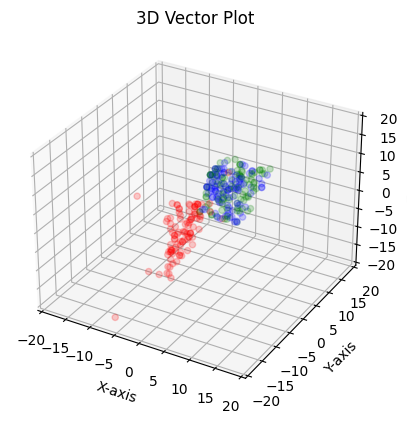

In [3]:
#Testing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new list to store reshaped matrices
reshaped_matrices = []

# Loop over each element in goodclassifier_class and reshape
for i in range(len(goodclassifier_class)):
    reshaped_matrix = goodclassifier_class[i].reshape((4, 4))
    reshaped_matrices.append(reshaped_matrix)

# Convert the list of reshaped matrices to a NumPy array
reshaped_goodclassifier_class = np.array(reshaped_matrices)
reshaped_goodclassifier_class = reshaped_goodclassifier_class.astype(int)

# Assign colors and labels to each set of vectors
colors = ['r', 'g', 'b', 'y']
labels = ['Good Classifier', 'Extends', "Doesn't Extend", 'Farthest B']

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot classifiers
for i in range(25):
    soa0 = reshaped_goodclassifier_class[i]
    soa0 = soa0[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa0[:, 0], soa0[:, 1], soa0[:, 2], color=colors[0], label=labels[0], alpha=0.2)

# Plot extendable mappings
for i in range(25):
    soa1 = extendable_class[i]
    soa1 = soa1[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa1[:, 0], soa1[:, 1], soa1[:, 2], color=colors[1], label=labels[1], alpha=0.2)

# Plot nonextendable mappings
for i in range(25):
    soa2 = nonextendable_class[i]
    soa2 = soa2[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa2[:, 0], soa2[:, 1], soa2[:, 2], color=colors[2], label=labels[2], alpha=0.2)

# Set limits for the axes
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title for the plot
plt.title('3D Vector Plot')

# Show the plot
plt.show()

### Used for later part, might need to delete later:
# PLOT CLASSIFIER
soa = np.array([[0, 0, 0, 0, -4, -4], [0, 0, 0, -7, 1, -2],
                [0, 0, 0, -1, -1, -3], [0, 0, 0, -6, -2, -3]])  # Vectors representing a "Good Classifier"
# Unpack the arrays for plotting
X, Y, Z, U, V, W = zip(*soa)
# Plot each set of vectors using quiver plot
ax.quiver(X, Y, Z, U, V, W, color=colors[0], label=labels[0], linewidth=0.5)

**The code below is the same as above, but I've implemented a neural network. This may not be useful right now, because NNs check for non-linear relationships!**

Epoch 1/10
2000/2000 [==============================] - 6s 2ms/step - loss: 0.2443 - accuracy: 0.8986 - val_loss: 0.1631 - val_accuracy: 0.9366
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1066 - accuracy: 0.9628 - val_loss: 0.0873 - val_accuracy: 0.9707
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9742 - val_loss: 0.0640 - val_accuracy: 0.9766
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9792 - val_loss: 0.0446 - val_accuracy: 0.9830
Epoch 5/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9830 - val_loss: 0.0429 - val_accuracy: 0.9830
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0388 - accuracy: 0.9846 - val_loss: 0.0470 - val_accuracy: 0.9809
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9876 - val_loss: 0.0386 - val_accuracy:

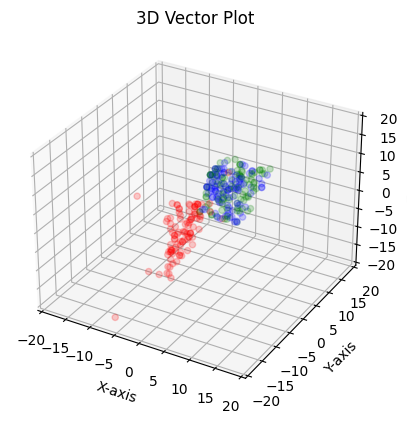

In [4]:
# testing w/ML

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load data
extendable_class = np.load("/content/extendableMappings.npy")
nonextendable_class = np.load("/content/nonExtendableMappings.npy")
goodclassifier_class = np.load("/content/trueClassifiersGoodMORE.npy")

# Create a new list to store reshaped matrices for good classifier
reshaped_matrices = []

# Loop over each element in goodclassifier_class and reshape
for i in range(len(goodclassifier_class)):
    reshaped_matrix = goodclassifier_class[i].reshape((4, 4))
    reshaped_matrices.append(reshaped_matrix)

# Convert the list of reshaped matrices to a NumPy array
reshaped_goodclassifier_class = np.array(reshaped_matrices)
reshaped_goodclassifier_class = reshaped_goodclassifier_class.astype(int)

# Combine extendable and non-extendable matrices for training the neural network
X_extendable = extendable_class.reshape((-1, 16))[:, :-1]
X_nonextendable = nonextendable_class.reshape((-1, 16))[:, :-1]
X = np.vstack((X_extendable, X_nonextendable))
y = np.hstack((np.ones(len(X_extendable)), np.zeros(len(X_nonextendable))))  # Label extendable as 1, non-extendable as 0

# Shuffle the data
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Assign colors and labels to each set of vectors
colors = ['r', 'g', 'b', 'y']
labels = ['Good Classifier', 'Extends', "Doesn't Extend", 'Farthest B']

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot classifiers
for i in range(25):
    soa0 = reshaped_goodclassifier_class[i]
    soa0 = soa0[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa0[:, 0], soa0[:, 1], soa0[:, 2], color=colors[0], label=labels[0], alpha=0.2)

# Plot extendable mappings
for i in range(25):
    soa1 = extendable_class[i]
    soa1 = soa1[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa1[:, 0], soa1[:, 1], soa1[:, 2], color=colors[1], label=labels[1], alpha=0.2)

# Plot nonextendable mappings
for i in range(25):
    soa2 = nonextendable_class[i]
    soa2 = soa2[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa2[:, 0], soa2[:, 1], soa2[:, 2], color=colors[2], label=labels[2], alpha=0.2)

# Set limits for the axes
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title for the plot
plt.title('3D Vector Plot')

# Show the plot
plt.show()

In [6]:
mydict = 0

# matrix[row,column]
for matrix_index in range(len(extendable_class)):
    matrix = extendable_class[matrix_index]
    if matrix[0,1] == -matrix[0,2]:
      print("nonextendable:", matrix, "\n first row!")
      mydict += 1
    elif matrix[1,1] == -matrix[1,2]:
      print("nonextendable:", matrix, "\n second row!")
      mydict += 1
    elif matrix[2,1] == -matrix[2,2]:
      print("nonextendable:", matrix, "\n third row!")
      mydict += 1
    elif matrix[3,1] == -matrix[3,2]:
      print("nonextendable:", matrix, "\n fourth row!")
      mydict += 1
    else:
      continue
      #print("there was no b(i) = -c(i)")

print("number of matrices where b = -c:", mydict)
print("number of extendable matrices total:", len(extendable_class))
print("percentage:", mydict/len(extendable_class))

'''
for matrix_index in range(4):
    matrix = extendable_class[matrix_index]
    print("extendable:", matrix)

    matrix1 = nonextendable_class[matrix_index]
    print("not extendable:", matrix1)
'''

Streaming output truncated to the last 5000 lines.
 [3 0 2 1]] 
 second row!
nonextendable: [[ 9  4  9  4]
 [ 9 -2  2  5]
 [ 9  2  9  2]
 [ 9  0  2  7]] 
 second row!
nonextendable: [[ 5  6  6  5]
 [ 8 -1  3  4]
 [ 4  8  6  6]
 [ 9 -3  3  3]] 
 fourth row!
nonextendable: [[ 4  0  0  4]
 [-3  9  3  3]
 [-3  9  3  3]
 [ 4  0  0  4]] 
 first row!
nonextendable: [[ 4 -1  2  1]
 [ 4  6  4  6]
 [ 9 -3  3  3]
 [-1  8  3  4]] 
 third row!
nonextendable: [[ 7  5  6  6]
 [ 6 -2  2  2]
 [ 9 -1  2  6]
 [ 4  4  6  2]] 
 second row!
nonextendable: [[ 8 -1  4  3]
 [-2  9  2  5]
 [ 3  9  5  7]
 [ 3 -1  1  1]] 
 fourth row!
nonextendable: [[-1  9  5  3]
 [ 8 -2  3  3]
 [ 1  0  0  1]
 [ 6  7  8  5]] 
 third row!
nonextendable: [[-2  9  3  4]
 [ 9 -1  4  4]
 [ 5  0  0  5]
 [ 2  8  7  3]] 
 third row!
nonextendable: [[-1  5  2  2]
 [ 4  0  1  3]
 [ 4  0  0  4]
 [-1  5  3  1]] 
 third row!
nonextendable: [[-1  4  1  2]
 [ 9  1  3  7]
 [ 3 -1  1  1]
 [ 5  6  3  8]] 
 third row!
nonextendable: [[ 8  1  3  6]

'\nfor matrix_index in range(4):\n    matrix = extendable_class[matrix_index]\n    print("extendable:", matrix)\n\n    matrix1 = nonextendable_class[matrix_index]\n    print("not extendable:", matrix1)\n'

# **Properties of the matrices**

**Basis, eigenvectors, and eigenvalues**

In [21]:
for matrix_index in range(5):  # Iterate over matrices
    matrix = extendable_class[matrix_index]  # Get the matrix at the current index
    eigenvalues, eigenvectors = np.linalg.eig(matrix.T @ matrix)
    basis = eigenvectors # The basis vectors are the eigenvectors
    #print("The Matrix: \n", matrix, "\n")
    print(matrix, "\n \n Basis of the matrix using Eigendecomposition: \n", basis, "\n")
    print("Eigenvalues:", eigenvalues, "\n")

[[-2  6  2  2]
 [ 7  1  3  5]
 [ 0  0  0  0]
 [ 5  7  5  7]] 
 
 Basis of the matrix using Eigendecomposition: 
 [[-0.47530894 -0.71270778  0.51587695 -0.06261907]
 [-0.51643908  0.69519111  0.48461168  0.06335733]
 [-0.40758465  0.05682949 -0.29702006 -0.81921577]
 [-0.58416337 -0.07434616 -0.64093803  0.56652469]] 

Eigenvalues: [ 2.27726849e+02  5.22731512e+01 -4.71225445e-15 -1.61128967e-15] 

[[ 6  7  5  8]
 [-3  9  3  3]
 [ 4  7  7  4]
 [-1  9  1  7]] 
 
 Basis of the matrix using Eigendecomposition: 
 [[-0.17485555 -0.83426803  0.5         0.15304374]
 [-0.73667459  0.42329676  0.5        -0.16772119]
 [-0.38062356 -0.34755605 -0.5        -0.69593857]
 [-0.53090658 -0.06341522 -0.5         0.68126112]] 

Eigenvalues: [ 4.55469834e+02  6.83942652e+01 -6.53777080e-15  2.01359005e+01] 

[[-2  9  4  3]
 [ 9  0  9  0]
 [-1  8  6  1]
 [ 8  1  7  2]] 
 
 Basis of the matrix using Eigendecomposition: 
 [[ 0.51988882 -0.61369571  0.5         0.32108128]
 [ 0.37510377  0.77478486  0.5    

**Null & Column Space**

In [22]:
import numpy as np

# Define a function to find null space
def null_space(matrix):
    _, _, vh = np.linalg.svd(matrix)
    null_mask = np.isclose(vh[-1], 0, atol=1e-14)  # Tolerance for considering an element to be zero
    ns_basis = vh[-1][null_mask].conj().T
    return ns_basis

# Define a function to find column space
def column_space(matrix):
    _, s, vh = np.linalg.svd(matrix)
    cs_basis = np.dot(matrix, vh.T)
    return cs_basis

for matrix_index in range(5):  # Iterate over matrices
    matrix = extendable_class[matrix_index]

    # Finding null and column space
    null_basis = null_space(matrix)
    column_basis = column_space(matrix)
    print(matrix, "\n Null Space Basis: \n", null_basis, "\n Column Space Basis: \n", column_basis, "\n")

[[-2  6  2  2]
 [ 7  1  3  5]
 [ 0  0  0  0]
 [ 5  7  5  7]] 
 Null Space Basis: 
 [] 
 Column Space Basis: 
 [[ 4.13151262e+00 -5.56152888e+00 -1.11022302e-15 -2.22044605e-15]
 [ 7.98717246e+00  4.49500568e+00 -2.22044605e-16  1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.21186851e+01 -1.06652320e+00 -1.33226763e-15 -2.77555756e-15]] 

[[ 6  7  5  8]
 [-3  9  3  3]
 [ 4  7  7  4]
 [-1  9  1  7]] 
 Null Space Basis: 
 [] 
 Column Space Basis: 
 [[-1.23562258e+01  4.28763287e+00  1.71461018e+00  1.33226763e-15]
 [-8.84009508e+00 -5.07956116e+00 -2.01265433e+00  7.77156117e-16]
 [-1.06441355e+01  3.06054802e+00 -2.70839894e+00  1.33226763e-15]
 [-1.05521854e+01 -3.85247632e+00  2.41035478e+00  7.77156117e-16]] 

[[-2  9  4  3]
 [ 9  0  9  0]
 [-1  8  6  1]
 [ 8  1  7  2]] 
 Null Space Basis: 
 [] 
 Column Space Basis: 
 [[ 5.77563765e+00 -8.69316464e+00  1.03484218e+00 -9.99200722e-16]
 [ 1.14695313e+01  5.43828299e+00 -9.35376887e-01  8.88178420

**RREF**

In [23]:
import numpy as np
from scipy.linalg import lu, inv

for matrix_index in range(5):  # Iterate over matrices
    matrix = extendable_class[matrix_index]
    def rref(matrix):
        P, L, U = lu(matrix) # Compute LU decomposition
        L_inv = inv(L)
        RREF = np.dot(L_inv, np.dot(P, matrix))
        return RREF

    result = rref(matrix)
    print(matrix, "\n \n RREF: \n", result, "\n")

[[-2  6  2  2]
 [ 7  1  3  5]
 [ 0  0  0  0]
 [ 5  7  5  7]] 
 
 RREF: 
 [[7.00000000e+00 1.00000000e+00 3.00000000e+00 5.00000000e+00]
 [0.00000000e+00 6.28571429e+00 2.85714286e+00 3.42857143e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.88178420e-16 0.00000000e+00 0.00000000e+00 8.88178420e-16]] 

[[ 6  7  5  8]
 [-3  9  3  3]
 [ 4  7  7  4]
 [-1  9  1  7]] 
 
 RREF: 
 [[ 6.00000000e+00  7.00000000e+00  5.00000000e+00  8.00000000e+00]
 [ 0.00000000e+00  1.25000000e+01  5.50000000e+00  7.00000000e+00]
 [-1.11022302e-16  0.00000000e+00 -2.64000000e+00  2.64000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.77635684e-15]] 

[[-2  9  4  3]
 [ 9  0  9  0]
 [-1  8  6  1]
 [ 8  1  7  2]] 
 
 RREF: 
 [[ 9.00000000e+00  0.00000000e+00  9.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.00000000e+00  6.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.66666667e+00 -1.66666667e+00]
 [ 1.77635684e-15 -8.88178420e-16  0.00000000e+00  8.8

# **Finding differences algebraically**

In [24]:
# TODO: double check that this calculation acutally checks for coplanar

def are_vectors_coplanar(v1, v2, v3):
    # Calculate scalar triple product
    scalar_triple_product = v1[0] * (v2[1]*v3[2] - v2[2]*v3[1]) - v1[1] * (v2[0]*v3[2] - v2[2]*v3[0]) + v1[2] * (v2[0]*v3[1] - v2[1]*v3[0])

    # Check if the scalar triple product is zero
    if scalar_triple_product == 0:
        return True
    else:
        return False


# Example usage:
v1 = soa[0, 3: ]
v2 = soa[1, 3: ]
v3 = soa[3, 3: ]
result = are_vectors_coplanar(v1, v2, v3)
print("Are the vectors coplanar?", result)
print(v1)
print(v2)
print(v3)


Are the vectors coplanar? False
[ 0 -4 -4]
[-7  1 -2]
[-6 -2 -3]


In [28]:
# TODO: double check that this calculation acutally checks for colinear

def is_row_collinear(matrix):
    for i, row in enumerate(matrix):
        submatrix = np.delete(matrix, i, axis=0)  # Exclude the current row
        submatrix = np.delete(submatrix, i, axis=1)  # Exclude the corresponding column
        determinant = np.linalg.det(submatrix)
        if np.isclose(determinant, 0):  # Check if determinant is close to zero
            return True
    return False

# Example usage:
matrix = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

result = is_row_collinear(matrix)
print("Is one of the rows collinear with the others?", result)


Is one of the rows collinear with the others? True


In [26]:
import numpy as np

def row_collinearity_score(matrix):
    min_abs_det = np.inf

    for i in range(4):
        submatrix = np.delete(matrix, i, axis=0)  # Exclude the current row
        for j in range(4):
            if i != j:
                submatrix_temp = np.delete(submatrix, j, axis=1)  # Exclude the corresponding column
                if submatrix_temp.shape[0] == submatrix_temp.shape[1]:  # Check if it's a square matrix
                    det = np.abs(np.linalg.det(submatrix_temp))
                    min_abs_det = min(min_abs_det, det)

    return min_abs_det

# Example usage:
matrix = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

score = row_collinearity_score(matrix)
print("Row collinearity score:", score)


Row collinearity score: 0.0


In [27]:
# check if row vectors in trueClassifiersGood are colinear

colinearCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  result = is_row_collinear(classifier)
  if result:
    colinearCount = colinearCount+1

print()
print(f"{colinearCount}/{len(trueClassifiersGood)} : {colinearCount/len(trueClassifiersGood)}")

# does the colinear classifier make it easier to verify by hand?
# Check how close a classifier is to being colinear by checking how many rows in the eschelon form are all 0's.

NameError: name 'trueClassifiersGood' is not defined

In [ ]:
# check if row vectors in trueClassifiersGood are colinear

row_collinearity_score
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  result = row_collinearity_score(classifier)
  if result != 0:
    print(f"{round(result, 2)}")

# does the colinear classifier make it easier to verify by hand?
# Check how close a classifier is to being colinear by checking how many rows in the eschelon form are all 0's.

In [ ]:
# check if row vectors in trueClassifiersGood are coplanar

# take out row 0
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[1, : 3]
  v2 = classifier[2, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 1
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[2, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 2
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[1, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 3
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[1, : 3]
  v3 = classifier[2, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")